In [200]:
import json
import country_converter as coco
import pandas as pd
import os
import sqlite3
from sqlite3 import Error
from statistics import mean
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

db_name = '/Users/alexraudvee/Downloads/tweets_final.db'

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))



In [201]:
countries ={'AW': 'ABW',
 'AF': 'AFG',
 'AO': 'AGO',
 'AI': 'AIA',
 'AX': 'ALA',
 'AL': 'ALB',
 'AD': 'AND',
 'AE': 'ARE',
 'AR': 'ARG',
 'AM': 'ARM',
 'AS': 'ASM',
 'AQ': 'ATA',
 'TF': 'ATF',
 'AG': 'ATG',
 'AU': 'AUS',
 'AT': 'AUT',
 'AZ': 'AZE',
 'BI': 'BDI',
 'BE': 'BEL',
 'BJ': 'BEN',
 'BQ': 'BES',
 'BF': 'BFA',
 'BD': 'BGD',
 'BG': 'BGR',
 'BH': 'BHR',
 'BS': 'BHS',
 'BA': 'BIH',
 'BL': 'BLM',
 'BY': 'BLR',
 'BZ': 'BLZ',
 'BM': 'BMU',
 'BO': 'BOL',
 'BR': 'BRA',
 'BB': 'BRB',
 'BN': 'BRN',
 'BT': 'BTN',
 'BV': 'BVT',
 'BW': 'BWA',
 'CF': 'CAF',
 'CA': 'CAN',
 'CC': 'CCK',
 'CH': 'CHE',
 'CL': 'CHL',
 'CN': 'CHN',
 'CI': 'CIV',
 'CM': 'CMR',
 'CD': 'COD',
 'CG': 'COG',
 'CK': 'COK',
 'CO': 'COL',
 'KM': 'COM',
 'CV': 'CPV',
 'CR': 'CRI',
 'CU': 'CUB',
 'CW': 'CUW',
 'CX': 'CXR',
 'KY': 'CYM',
 'CY': 'CYP',
 'CZ': 'CZE',
 'DE': 'DEU',
 'DJ': 'DJI',
 'DM': 'DMA',
 'DK': 'DNK',
 'DO': 'DOM',
 'DZ': 'DZA',
 'EC': 'ECU',
 'EG': 'EGY',
 'ER': 'ERI',
 'EH': 'ESH',
 'ES': 'ESP',
 'EE': 'EST',
 'ET': 'ETH',
 'FI': 'FIN',
 'FJ': 'FJI',
 'FK': 'FLK',
 'FR': 'FRA',
 'FO': 'FRO',
 'FM': 'FSM',
 'GA': 'GAB',
 'GB': 'GBR',
 'GE': 'GEO',
 'GG': 'GGY',
 'GH': 'GHA',
 'GI': 'GIB',
 'GN': 'GIN',
 'GP': 'GLP',
 'GM': 'GMB',
 'GW': 'GNB',
 'GQ': 'GNQ',
 'GR': 'GRC',
 'GD': 'GRD',
 'GL': 'GRL',
 'GT': 'GTM',
 'GF': 'GUF',
 'GU': 'GUM',
 'GY': 'GUY',
 'HK': 'HKG',
 'HM': 'HMD',
 'HN': 'HND',
 'HR': 'HRV',
 'HT': 'HTI',
 'HU': 'HUN',
 'ID': 'IDN',
 'IM': 'IMN',
 'IN': 'IND',
 'IO': 'IOT',
 'IE': 'IRL',
 'IR': 'IRN',
 'IQ': 'IRQ',
 'IS': 'ISL',
 'IL': 'ISR',
 'IT': 'ITA',
 'JM': 'JAM',
 'JE': 'JEY',
 'JO': 'JOR',
 'JP': 'JPN',
 'KZ': 'KAZ',
 'KE': 'KEN',
 'KG': 'KGZ',
 'KH': 'KHM',
 'KI': 'KIR',
 'KN': 'KNA',
 'KR': 'KOR',
 'KW': 'KWT',
 'LA': 'LAO',
 'LB': 'LBN',
 'LR': 'LBR',
 'LY': 'LBY',
 'LC': 'LCA',
 'LI': 'LIE',
 'LK': 'LKA',
 'LS': 'LSO',
 'LT': 'LTU',
 'LU': 'LUX',
 'LV': 'LVA',
 'MO': 'MAC',
 'MF': 'MAF',
 'MA': 'MAR',
 'MC': 'MCO',
 'MD': 'MDA',
 'MG': 'MDG',
 'MV': 'MDV',
 'MX': 'MEX',
 'MH': 'MHL',
 'MK': 'MKD',
 'ML': 'MLI',
 'MT': 'MLT',
 'MM': 'MMR',
 'ME': 'MNE',
 'MN': 'MNG',
 'MP': 'MNP',
 'MZ': 'MOZ',
 'MR': 'MRT',
 'MS': 'MSR',
 'MQ': 'MTQ',
 'MU': 'MUS',
 'MW': 'MWI',
 'MY': 'MYS',
 'YT': 'MYT',
 'NA': 'NAM',
 'NC': 'NCL',
 'NE': 'NER',
 'NF': 'NFK',
 'NG': 'NGA',
 'NI': 'NIC',
 'NU': 'NIU',
 'NL': 'NLD',
 'NO': 'NOR',
 'NP': 'NPL',
 'NR': 'NRU',
 'NZ': 'NZL',
 'OM': 'OMN',
 'PK': 'PAK',
 'PA': 'PAN',
 'PN': 'PCN',
 'PE': 'PER',
 'PH': 'PHL',
 'PW': 'PLW',
 'PG': 'PNG',
 'PL': 'POL',
 'PR': 'PRI',
 'KP': 'PRK',
 'PT': 'PRT',
 'PY': 'PRY',
 'PS': 'PSE',
 'PF': 'PYF',
 'QA': 'QAT',
 'RE': 'REU',
 'RO': 'ROU',
 'RU': 'RUS',
 'RW': 'RWA',
 'SA': 'SAU',
 'SD': 'SDN',
 'SN': 'SEN',
 'SG': 'SGP',
 'GS': 'SGS',
 'SH': 'SHN',
 'SJ': 'SJM',
 'SB': 'SLB',
 'SL': 'SLE',
 'SV': 'SLV',
 'SM': 'SMR',
 'SO': 'SOM',
 'PM': 'SPM',
 'RS': 'SRB',
 'SS': 'SSD',
 'ST': 'STP',
 'SR': 'SUR',
 'SK': 'SVK',
 'SI': 'SVN',
 'SE': 'SWE',
 'SZ': 'SWZ',
 'SX': 'SXM',
 'SC': 'SYC',
 'SY': 'SYR',
 'TC': 'TCA',
 'TD': 'TCD',
 'TG': 'TGO',
 'TH': 'THA',
 'TJ': 'TJK',
 'TK': 'TKL',
 'TM': 'TKM',
 'TL': 'TLS',
 'TO': 'TON',
 'TT': 'TTO',
 'TN': 'TUN',
 'TR': 'TUR',
 'TV': 'TUV',
 'TW': 'TWN',
 'TZ': 'TZA',
 'UG': 'UGA',
 'UA': 'UKR',
 'UM': 'UMI',
 'UY': 'URY',
 'US': 'USA',
 'UZ': 'UZB',
 'VA': 'VAT',
 'VC': 'VCT',
 'VE': 'VEN',
 'VG': 'VGB',
 'VI': 'VIR',
 'VN': 'VNM',
 'VU': 'VUT',
 'WF': 'WLF',
 'WS': 'WSM',
 'YE': 'YEM',
 'ZA': 'ZAF',
 'ZM': 'ZMB',
 'ZW': 'ZWE'}

avia_companies = {'KLM': 56377143, 'AirFrance': 106062176, 'British_Airways': 18332190, 'AmericanAir': 22536055,
                  'Lufthansa': 124476322, 'AirBerlin': 26223583,
                  'AirBerlin assist': 2182373406, 'easyJet': 38676903, 'RyanAir': 1542862735, 'SingaporeAir': 253340062,
                  'Qantas': 218730857, 'EtihadAirways': 45621423,
                  'VirginAtlantic': 20626359}

exclude_list = avia_companies.values()

In [202]:
# functions that we are going to use

def create_connection(db_file):
    """ create a database connection to a SQLite database """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        print(sqlite3.version)
    except Error as e:
        print(e)
    return conn


def convert(label):
    ddict = {'negative':-1, 'neutral':0, 'positive':1}
    return ddict[label]


def get_margin(a3, df):
    try:
        margin = df[df['alpha_3'] == a3]['tweet_id'].values[0]
    except:
        margin = 0

    return margin



In [203]:
# create connection with the database 
conn = create_connection(db_name)

2.6.0


In [204]:
query = '''
    SELECT tweet_id, tweet_geo_id, full_name, country, country_code, sentiment_label, timestamp_ms, tweets.tweet_type AS type, tweets.user_id
    FROM tweets_geo, tweets
    WHERE tweet_id = tweet_geo_id AND (type = 'original' OR type = 'reply')
'''

df = pd.read_sql_query(query, conn)

df

,tweet_id,tweet_geo_id,full_name,country,country_code,sentiment_label,timestamp_ms,type,user_id
0,1131173142414712832,1131173142414712832,"Ferno, Lombardia",Italy,IT,negative,1558527667989,reply,210981687
1,1131173455473201153,1131173455473201153,"Cuauhtémoc, Distrito Federal",México,MX,neutral,1558527742628,original,224414541
2,1131174183814258688,1131174183814258688,"South Aegean, Greece",Hellas,GR,positive,1558527916278,reply,309076025
3,1131175392482594816,1131175392482594816,Ronald Reagan Washington National Airport (DCA),Estados Unidos,US,neutral,1558528204447,original,3383965005
4,1131178683320983563,1131178683320983563,"el Prat de Llobregat, Espanya",Spain,ES,neutral,1558528989044,original,93726008
...,...,...,...,...,...,...,...,...,...
154148,1244695724220190721,1244695724220190721,"Leeds, England",United Kingdom,GB,negative,1585593560639,original,578097083
154149,1244696076940083201,1244696076940083201,"Moca, Dominican Republic",Dominican Republic,DO,negative,1585593644734,reply,39880723
154150,1244696128441978882,1244696128441978882,"Colesville, MD",United States,US,neutral,1585593657013,original,34813027
154151,1244696155851837441,1244696155851837441,"Haarlemmermeer, Nederland",Nederland,NL,neutral,1585593663548,original,91104226


In [205]:
df['sentiment_int'] = df['sentiment_label'].apply(convert)
df_grouped = df.groupby('country_code').count()[['sentiment_int']]

df_clean = df_grouped.reset_index().drop(0)
df_clean.drop(df_clean[df_clean['country_code']=='XK'].index, inplace=True)

df_test = df.groupby('country_code').count().reset_index()
df_clean['alpha_3']= df_clean['country_code'].apply(lambda x: countries[x])
df_clean_upd = df_clean[df_clean['country_code'].isin(df_test[df_test['tweet_id']>20]['country_code'].drop(0).values.tolist())]
world['margin'] = world['iso_a3'].apply(get_margin, args=(df_clean_upd,))


In [206]:
df_neg_geo

,country_code,tweet_id,alpha_3
1,AD,1,AND
2,AE,186,ARE
3,AG,10,ATG
4,AL,5,ALB
5,AM,3,ARM
...,...,...,...
165,VI,11,VIR
166,VN,20,VNM
167,VU,2,VUT
169,ZA,199,ZAF


In [207]:
df_neg_geo = df[(df['type'] == 'original') ] 
df_neg_geo = df_neg_geo[df_neg_geo['sentiment_int'] == -1]
df_neg_geo.user_id.mask(df_neg_geo.tweet_id.isin(exclude_list),inplace=True)

df_neg_geo

,tweet_id,tweet_geo_id,full_name,country,country_code,sentiment_label,timestamp_ms,type,user_id,sentiment_int
5,1131179211027304450,1131179211027304450,"Riga, Latvia",Latvia,LV,negative,1558529114859,original,735605719,-1
6,1131180997909917696,1131180997909917696,"Grapevine, TX",United States,US,negative,1558529540885,original,21435317,-1
7,1131181193767079938,1131181193767079938,"Faro, Portugal",Portugal,PT,negative,1558529587581,original,712055036,-1
10,1131181731137110021,1131181731137110021,"Bourne, England",United Kingdom,GB,negative,1558529715700,original,266812894,-1
20,1131198326462910467,1131198326462910467,"Harwich, England",United Kingdom,GB,negative,1558533672334,original,1013478272,-1
...,...,...,...,...,...,...,...,...,...,...
154140,1244693591580180490,1244693591580180490,"Maidenhead, South East",United Kingdom,GB,negative,1585593052178,original,4023276917,-1
154143,1244694362983927810,1244694362983927810,"Milton Keynes, England",United Kingdom,GB,negative,1585593236095,original,185535488,-1
154144,1244694586242428928,1244694586242428928,"Wandsworth, London",United Kingdom,GB,negative,1585593289324,original,19708944,-1
154148,1244695724220190721,1244695724220190721,"Leeds, England",United Kingdom,GB,negative,1585593560639,original,578097083,-1


In [208]:
# take only needed info from the dataframe for the plot 
df_neg_geo = df[(df['type'] == 'original') ] 
df_neg_geo = df_neg_geo[df_neg_geo['sentiment_int'] == -1]
df_neg_geo.user_id.mask(df_neg_geo.tweet_id.isin(exclude_list),inplace=True)

# group by country code with counted number of negatives tweets
df_neg_geo = df_neg_geo.groupby('country_code').count()[['tweet_id']].reset_index().drop(0)

# eluminate the row with XK because it is not in pandas anymore
df_neg_geo = df_neg_geo[df_neg_geo.country_code != 'XK']

# add the alpha3 instead of the code 
df_neg_geo['alpha_3'] = df_neg_geo['country_code'].apply(lambda x: countries[x])

# df_neg_geo = df_neg_geo[df_neg_geo['tweet_id'] > 20]

# add all them in the world dataframe 
world['margin'] = world['iso_a3'].apply(lambda row: get_margin(row, df_neg_geo))


In [209]:
world[world['margin'] != 0]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,margin
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",7
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",5
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",312
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",14656
5,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",1
...,...,...,...,...,...,...,...
170,3856181,Europe,Bosnia and Herz.,BIH,42530.0,"POLYGON ((18.56000 42.65000, 17.67492 43.02856...",6
171,2103721,Europe,Macedonia,MKD,29520.0,"POLYGON ((22.38053 42.32026, 22.88137 41.99930...",3
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",13
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",4


/Users/alexraudvee/opt/anaconda3/envs/personal_use/lib/python3.10/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


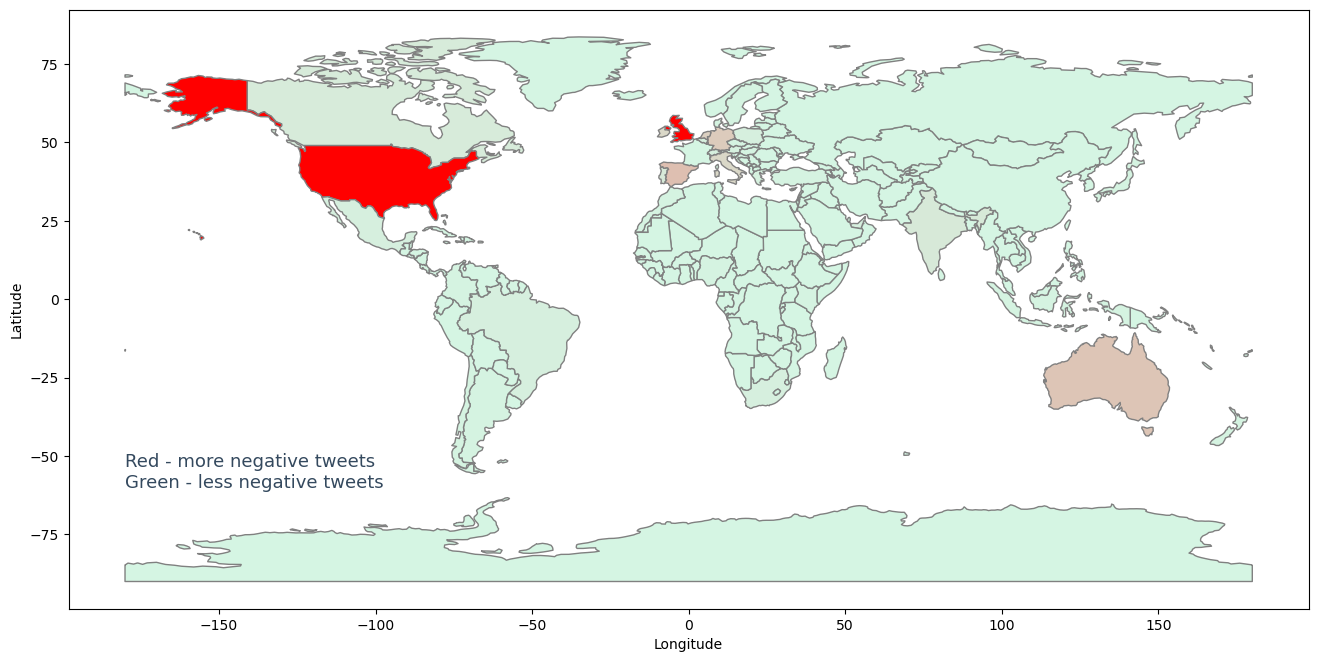

In [267]:
# create new color map 
from  matplotlib.colors import LinearSegmentedColormap
cmap=LinearSegmentedColormap.from_list('rg',['#D5F5E3', 'red', 'red'], N=256)

ax2 = world.plot(column='margin',  figsize=(16,16), edgecolor=u'gray', cmap=cmap)
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.text(x=-180, y=-60, s="""Red - more negative tweets \nGreen - less negative tweets""", c='#34495E', size=13)

plt.show()

In [244]:
# get the top 5 countries with highest negative tweets as the list of country codes 
df_further_exploration = df_neg_geo.sort_values(by='tweet_id', ascending=False).head(5)
top_country_with_negs = df_further_exploration.country_code.to_frame().reset_index()
top_country_with_negs

,index,country_code
0,159,US
1,55,GB
2,50,ES
3,10,AU
4,42,DE


In [245]:
query = """
    SELECT tweet_id, tweet_geo_id user_id, timestamp_ms, country_code, sentiment_label
    FROM tweets, tweets_geo
    WHERE (tweet_id = tweet_geo_id)
"""

df_for_topics = pd.read_sql_query(query, conn)

In [247]:
df_for_topics = pd.merge(df_for_topics, top_country_with_negs, on='country_code')

In [248]:
df_for_topics

,tweet_id,user_id,timestamp_ms,country_code,sentiment_label,index
0,1131175392482594816,1131175392482594816,1558528204447,US,neutral,159
1,1131180997909917696,1131180997909917696,1558529540885,US,negative,159
2,1131181668138668034,1131181668138668034,1558529700680,US,positive,159
3,1131185159649124352,1131185159649124352,1558530533121,US,positive,159
4,1131186150109003776,1131186150109003776,1558530769265,US,neutral,159
...,...,...,...,...,...,...
123650,1244588676094365696,1244588676094365696,1585568038377,AU,negative,10
123651,1244593106869092352,1244593106869092352,1585569094756,AU,negative,10
123652,1244593867724181504,1244593867724181504,1585569276158,AU,neutral,10
123653,1244606118942216193,1244606118942216193,1585572197076,AU,positive,10


In [264]:
# 1558528204447 1558530769265

# dfgg = df_for_topics['timestamp_ms'].loc[:, 1558528204447:1558530769265]

df_for_topics[(df_for_topics['timestamp_ms'] > start) & (df_for_topics['timestamp_ms'] < end)]

,tweet_id,user_id,timestamp_ms,country_code,sentiment_label,index
1,1131180997909917696,1131180997909917696,1558529540885,US,negative,159
2,1131181668138668034,1131181668138668034,1558529700680,US,positive,159
3,1131185159649124352,1131185159649124352,1558530533121,US,positive,159
53599,1131178015705174023,1131178015705174023,1558528829872,GB,positive,55
53600,1131181328991510529,1131181328991510529,1558529619821,GB,positive,55
53601,1131181731137110021,1131181731137110021,1558529715700,GB,negative,55
53602,1131184054768947200,1131184054768947200,1558530269697,GB,positive,55
102529,1131178683320983563,1131178683320983563,1558528989044,ES,neutral,50
102530,1131182734259445761,1131182734259445761,1558529954863,ES,positive,50


In [266]:
type(df_for_topics['timestamp_ms'].loc[0])

numpy.int64